In [1]:
import camelot
import tabula

In [2]:
import os #Files in listen abgreifen
import tqdm #anzeigen, wo wir stehen
import textract
import pandas as pd
import numpy as np
%matplotlib inline

# Text aus PDF / Bild

In [3]:
text = textract.process("Wahlbeteiligung_nach_Land.jpg", method='pdfminer', encoding='ISO-8859-1')

In [4]:
text

b'22.10.2019 - 14:30 Alle Zelten sind in GMT#+2\n\nWahlbeteiligung nach Land (%)\n\nEndergebnisse\nLand 1979 1981 1984 1987 1989 1994 1995 1996 1999 2004 2007 2009 2013 2014 2019\nBelgien 91,36 92,09 90,73 90,66 91,05 90,81 90,39 89,64 88,47\nDanemark 47,82 92,38 46,17 52,92 50,46 47,89 59,54 56,32 66,08,\nDeutschland 65,73 96,76 62,28 60,02 45,19 43,00 43,27 48,10 61,38,\nIrland 63,61 47,56 68,28 43,98, 50,21 58,58 58,64 52,44 49,70\nFrankreich 60,71 96,72 48,80 52,71 46,76 42,76 40,63 42,43, 50,12\nltatien 85,65 82,47 81,07 73,60 69,76 71,72 66.47 87,22 54,50\nLuxemburg 88,1 88,79 87,39 88,55 87.27 91,35 90,76 85,55 84,24\nNiederlande 98,12 90,88 47,48. 35,69 30,02 39,26 36,75 37,32, 41,93,\nVereinigtes K\xc3\xa9nigreich 32,35 32,97 36,37 36,43 24,00 38,52 34,70 35,60 37,18\nGriechenland 81,48 80,59 80,03 73,18 70,25 63,22 52,54 59.97 58,69\nSpanien 68,52 54,71 59,14 63.05 45,14 44,87 43,81 60,73\nPortugal 72,42 51,10 35,54 39,93 38,60 36,77 33,67 30,75\nSchweden 41,63 38,84 37,85 45

In [5]:
df = pd.DataFrame([text])

In [6]:
df

,0
0,b'22.10.2019 - 14:30 Alle Zelten sind in GMT#+...


# Versuch mit csv

In [7]:
path = ('Wahlbeteiligung-nach-Land-neu.csv')

In [8]:
with open(path) as f:
    dateiinhalt = f.read()

In [9]:
dateiinhalt

',Land,1979,1981,1984,1987,1989,1994,1995,1996,1999,2004,2007,2009,2013,2014,2019\n,Belgien,91.36,,92.09,,90.73,90.66,,,91.05,90.81,,90.39,,89.64,88.47\n,Dänemark,47.82,,52.38,,46.17,52.92,,,50.46,47.89,,59.54,,56.32,66.08\n,Deutschland,65.73,,56.76,,62.28,60.02,,,45.19,43.00,,43.27,,48.10,61.38\n,Irland,63.61,,47.56,,68.28,43.98,,,50.21,58.58,,58.64,,52.44,49.70\n,Frankreich,60.71,,56.72,,48.80,52.71,,,46.76,42.76,,40.63,,42.43,50.12\n,Italien,85.65,,82.47,,81.07,73.60,,,69.76,71.72,,66.47,,57.22,54.50\n,Luxemburg,88.91,,88.79,,87.39,88.55,,,87.27,91.35,,90.76,,85.55,84.24\n,Niederlande,58.12,,50.88,,47.48,35.69,,,30.02,39.26,,36.75,,37.32,41.93\n,Vereinigtes Königreich,32.35,,32.57,,36.37,36.43,,,24.00,38.52,,34.70,,35.60,37.18\n,Griechenland,,81.48,80.59,,80.03,73.18,,,70.25,63.22,,52.54,,59.97,58.69\n,Spanien,,,,68.52,54.71,59.14,,,63.05,45.14,,44.87,,43.81,60.73\n,Portugal,,,,72.42,51.10,35.54,,,39.93,38.60,,36.77,,33.67,30.75\n,Schweden,,,,,,,41.63,,38.84,37.85,,45.53,,51.07,55.2

In [10]:
df = pd.read_csv(path)

In [11]:
df.shape

(29, 17)

In [12]:
df.dtypes

Unnamed: 0    float64
Land           object
1979          float64
1981          float64
1984          float64
1987          float64
1989          float64
1994          float64
1995          float64
1996          float64
1999          float64
2004          float64
2007          float64
2009          float64
2013          float64
2014          float64
2019          float64
dtype: object

In [13]:
del df['Unnamed: 0']
df

,Land,1979,1981,1984,1987,1989,1994,1995,1996,1999,2004,2007,2009,2013,2014,2019
0,Belgien,91.36,NaN,92.09,NaN,90.73,90.66,NaN,NaN,91.05,90.81,NaN,90.39,NaN,89.64,88.47
1,Dänemark,47.82,NaN,52.38,NaN,46.17,52.92,NaN,NaN,50.46,47.89,NaN,59.54,NaN,56.32,66.08
2,Deutschland,65.73,NaN,56.76,NaN,62.28,60.02,NaN,NaN,45.19,43.00,NaN,43.27,NaN,48.10,61.38
3,Irland,63.61,NaN,47.56,NaN,68.28,43.98,NaN,NaN,50.21,58.58,NaN,58.64,NaN,52.44,49.70
4,Frankreich,60.71,NaN,56.72,NaN,48.80,52.71,NaN,NaN,46.76,42.76,NaN,40.63,NaN,42.43,50.12
5,Italien,85.65,NaN,82.47,NaN,81.07,73.60,NaN,NaN,69.76,71.72,NaN,66.47,NaN,57.22,54.50
6,Luxemburg,88.91,NaN,88.79,NaN,87.39,88.55,NaN,NaN,87.27,91.35,NaN,90.76,NaN,85.55,84.24
7,Niederlande,58.12,NaN,50.88,NaN,47.48,35.69,NaN,NaN,30.02,39.26,NaN,36.75,NaN,37.32,41.93
8,Vereinigtes Königreich,32.35,NaN,32.57,NaN,36.37,36.43,NaN,NaN,24.00,38.52,NaN,34.70,NaN,35.60,37.18
9,Griechenland,NaN,81.48,80.59,NaN,80.03,73.18,NaN,NaN,70.25,63.22,NaN,52.54,NaN,59.97,58.69


In [14]:
# eine Spalte
df['2019']

0     88.47
1     66.08
2     61.38
3     49.70
4     50.12
5     54.50
6     84.24
7     41.93
8     37.18
9     58.69
10    60.73
11    30.75
12    55.27
13    59.80
14    40.80
15    28.72
16    37.60
17    44.99
18    53.48
19    33.53
20    43.36
21    72.70
22    45.68
23    28.89
24    22.74
25    32.64
26    51.20
27    29.85
28    50.66
Name: 2019, dtype: float64

In [45]:
# eine Zeile
df.iloc[28]

1979    61.99
1981      NaN
1984    58.98
1987      NaN
1989    58.41
1994    56.67
1995      NaN
1996      NaN
1999    49.51
2004    45.47
2007      NaN
2009    42.97
2013      NaN
2014    42.61
2019    50.66
Name: EU Gesamt, dtype: float64

In [16]:
headers = df.head(0)
print(headers)

Empty DataFrame
Columns: [Land, 1979, 1981, 1984, 1987, 1989, 1994, 1995, 1996, 1999, 2004, 2007, 2009, 2013, 2014, 2019]
Index: []


In [46]:
### Land als Index

#df.set_index('Land', inplace=True)


In [47]:
df

,1979,1981,1984,1987,1989,1994,1995,1996,1999,2004,2007,2009,2013,2014,2019
Land,,,,,,,,,,,,,,,
Belgien,91.36,NaN,92.09,NaN,90.73,90.66,NaN,NaN,91.05,90.81,NaN,90.39,NaN,89.64,88.47
Dänemark,47.82,NaN,52.38,NaN,46.17,52.92,NaN,NaN,50.46,47.89,NaN,59.54,NaN,56.32,66.08
Deutschland,65.73,NaN,56.76,NaN,62.28,60.02,NaN,NaN,45.19,43.00,NaN,43.27,NaN,48.10,61.38
Irland,63.61,NaN,47.56,NaN,68.28,43.98,NaN,NaN,50.21,58.58,NaN,58.64,NaN,52.44,49.70
Frankreich,60.71,NaN,56.72,NaN,48.80,52.71,NaN,NaN,46.76,42.76,NaN,40.63,NaN,42.43,50.12
Italien,85.65,NaN,82.47,NaN,81.07,73.60,NaN,NaN,69.76,71.72,NaN,66.47,NaN,57.22,54.50
Luxemburg,88.91,NaN,88.79,NaN,87.39,88.55,NaN,NaN,87.27,91.35,NaN,90.76,NaN,85.55,84.24
Niederlande,58.12,NaN,50.88,NaN,47.48,35.69,NaN,NaN,30.02,39.26,NaN,36.75,NaN,37.32,41.93
Vereinigtes Königreich,32.35,NaN,32.57,NaN,36.37,36.43,NaN,NaN,24.00,38.52,NaN,34.70,NaN,35.60,37.18


In [42]:
###  Indexspalte mit Jahreszahlen vertauschen

#df.pivot(index=[], columns='Land')    #

#df.unstack('Land')'1979', '1981', '1984', '1987', '1989', '1994', '1995', '1996', '1999', '2004', '2007', '2009', '2013', '2014', '2019'])

#pd.pivot_table(df, index='Land', columns=loc[0]

In [20]:
#
#df.transpose funktioniert nicht

In [35]:
#df.swapaxes("index", "columns")


In [48]:
df.dtypes

1979    float64
1981    float64
1984    float64
1987    float64
1989    float64
1994    float64
1995    float64
1996    float64
1999    float64
2004    float64
2007    float64
2009    float64
2013    float64
2014    float64
2019    float64
dtype: object

In [50]:
df_eu = df.iloc[28]


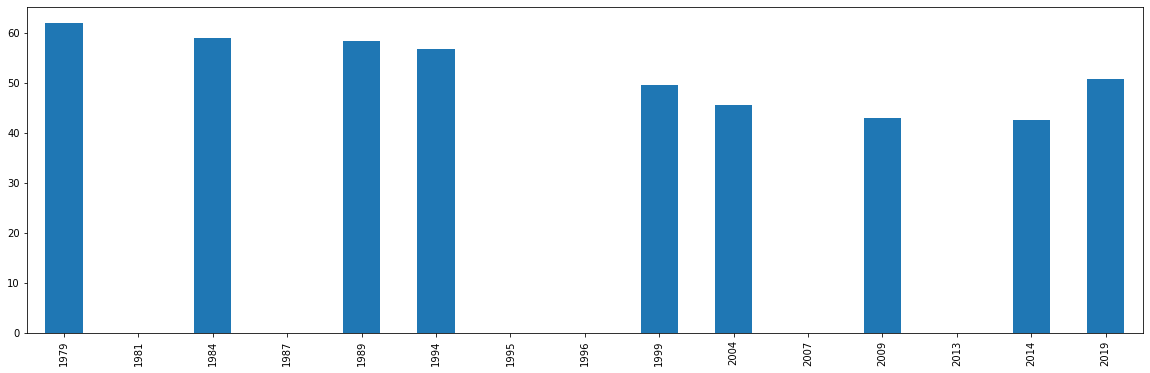

In [52]:
df_eu.plot(kind='bar', figsize=(20,6))